# LAB 2 - Desicion trees and data processing

### Section 1 - Make your own data set


In [85]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file
data, meta = arff.loadarff('WeeklySpending.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

   Week  Groceries   Rent  Utilities  Transportation  Entertainment  \
0   1.0      150.0  800.0      100.0            50.0           60.0   
1   2.0      160.0  850.0      110.0            55.0           65.0   
2   3.0      155.0  900.0      105.0            52.0           62.0   
3   4.0      158.0  750.0      108.0            54.0           64.0   
4   5.0      162.0  800.0      112.0            56.0           66.0   

   Dining_Out  Sports  Savings  Miscellaneous  InSchool  
0        70.0    30.0    200.0           40.0   b'true'  
1        75.0    35.0    210.0           45.0  b'false'  
2        72.0    32.0    205.0           42.0   b'true'  
3        74.0    34.0    208.0           44.0   b'true'  
4        76.0    36.0    212.0           46.0   b'true'  


In [86]:
#now we need to reformat the b'true' , b'false' to True and False
df['InSchool'] = df['InSchool'].apply(lambda x: True if x == b'true' else False)

print(df.head())

   Week  Groceries   Rent  Utilities  Transportation  Entertainment  \
0   1.0      150.0  800.0      100.0            50.0           60.0   
1   2.0      160.0  850.0      110.0            55.0           65.0   
2   3.0      155.0  900.0      105.0            52.0           62.0   
3   4.0      158.0  750.0      108.0            54.0           64.0   
4   5.0      162.0  800.0      112.0            56.0           66.0   

   Dining_Out  Sports  Savings  Miscellaneous  InSchool  
0        70.0    30.0    200.0           40.0      True  
1        75.0    35.0    210.0           45.0     False  
2        72.0    32.0    205.0           42.0      True  
3        74.0    34.0    208.0           44.0      True  
4        76.0    36.0    212.0           46.0      True  


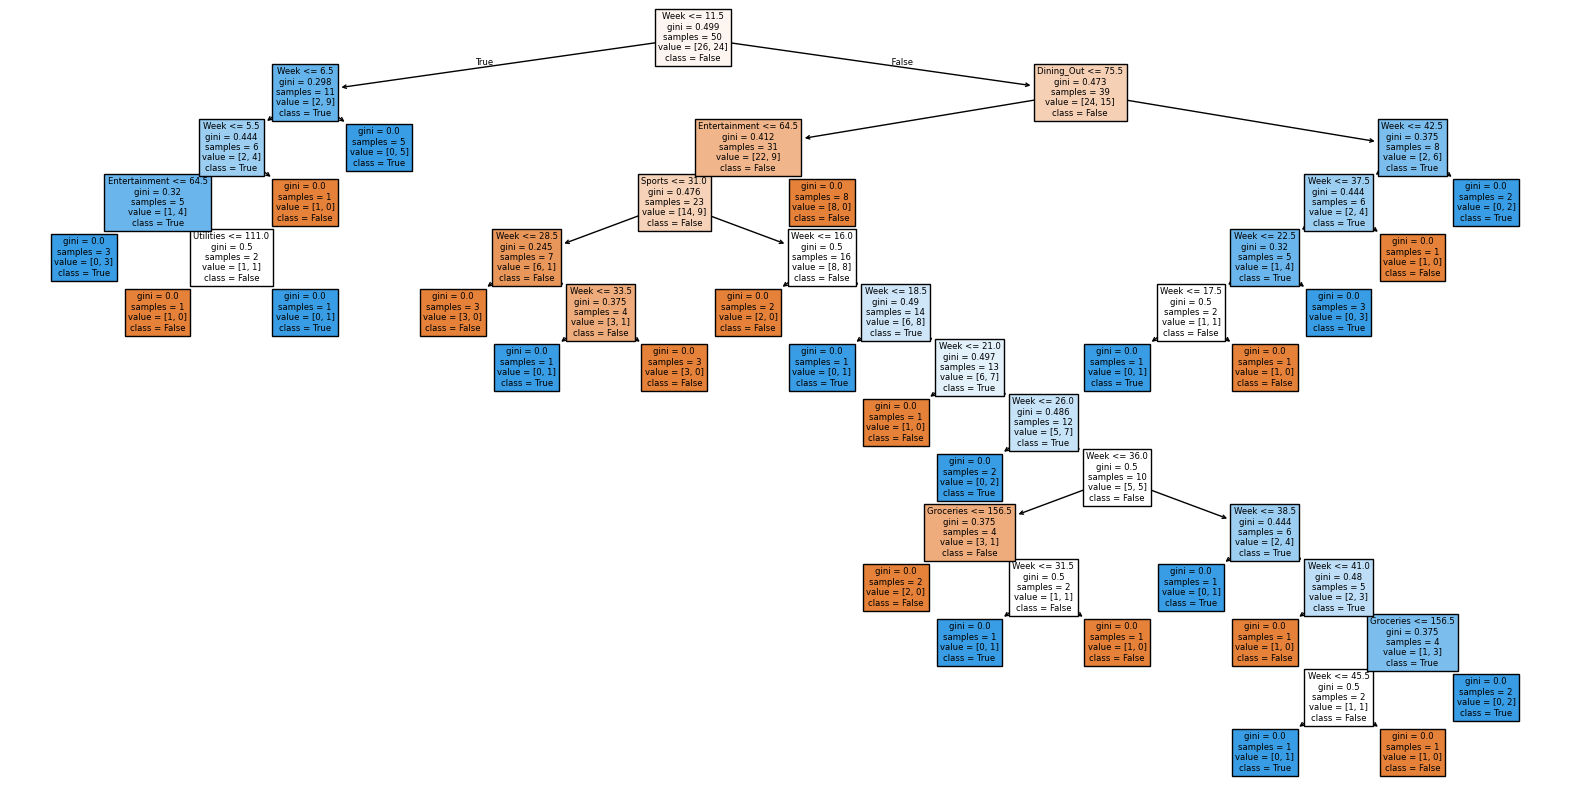

In [87]:
from sklearn import tree
from sklearn.model_selection import train_test_split

#we shouldn't have to do anymore preprocessing for this one because I made it
#and I know it's clean
# Prepare the feature matrix (X) and target vector (y)
X = df.drop('InSchool', axis=1)
y = df['InSchool']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# Fit the model
clf.fit(X, y)

# Display the tree structure
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['False', 'True'], filled=True)
plt.show()

*This is an interesting result. Because it is just made up data it actually picked the week as the first splitting attribute. This is still a very interesting tree though and it does successfully categorize all of the data.*

In [88]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

errors = []

for i in range(10):
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    errors.append(1 - scores)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f'Mean error: {mean_error:.2f}')
print(f'Standard deviation of error: {std_error:.2f}')

Mean error: 0.52
Standard deviation of error: 0.17


*Let us discuss this error real quick. Again since this is a more or less randomly generated datasset from me the data doesn't fit a decision tree super well. If I had more standardized the prices of things like rent then this tree would probably be much smaller and also much more accurate. However; for how random I made the data I think that a 48% accuracy is actually not the worst it could be. Now we will start doing some real data sets where we will see trees and error that makes much more sense.*

### Section 2 - kr-vs-kp

In [89]:
sec2_data = arff.loadarff('dataset_3_kr-vs-kp.arff')

sec2_df = pd.DataFrame(sec2_data[0])

print(sec2_df.head())

  bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... spcop  \
0  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  ...  b'f'   
1  b'f'  b'f'  b'f'  b'f'  b't'  b'f'  b'f'  b'f'  b'f'  b'f'  ...  b'f'   
2  b'f'  b'f'  b'f'  b'f'  b't'  b'f'  b't'  b'f'  b'f'  b'f'  ...  b'f'   
3  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b't'  b'f'  ...  b'f'   
4  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  b'f'  ...  b'f'   

  stlmt thrsk wkcti wkna8 wknck wkovl wkpos wtoeg   class  
0  b'f'  b'f'  b'f'  b'f'  b'f'  b't'  b't'  b'n'  b'won'  
1  b'f'  b'f'  b'f'  b'f'  b'f'  b't'  b't'  b'n'  b'won'  
2  b'f'  b'f'  b'f'  b'f'  b'f'  b't'  b't'  b'n'  b'won'  
3  b'f'  b'f'  b'f'  b'f'  b'f'  b't'  b't'  b'n'  b'won'  
4  b'f'  b'f'  b'f'  b'f'  b'f'  b't'  b't'  b'n'  b'won'  

[5 rows x 37 columns]


In [90]:
#This is really dirty data, so we need to clean it up

#They are in byte string format so we need to decode them using the pandas applymap function
sec2_df = sec2_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

print(sec2_df.head())

  bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... spcop  \
0     f     f     f     f     f     f     f     f     f     f  ...     f   
1     f     f     f     f     t     f     f     f     f     f  ...     f   
2     f     f     f     f     t     f     t     f     f     f  ...     f   
3     f     f     f     f     f     f     f     f     t     f  ...     f   
4     f     f     f     f     f     f     f     f     f     f  ...     f   

  stlmt thrsk wkcti wkna8 wknck wkovl wkpos wtoeg class  
0     f     f     f     f     f     t     t     n   won  
1     f     f     f     f     f     t     t     n   won  
2     f     f     f     f     f     t     t     n   won  
3     f     f     f     f     f     t     t     n   won  
4     f     f     f     f     f     t     t     n   won  

[5 rows x 37 columns]


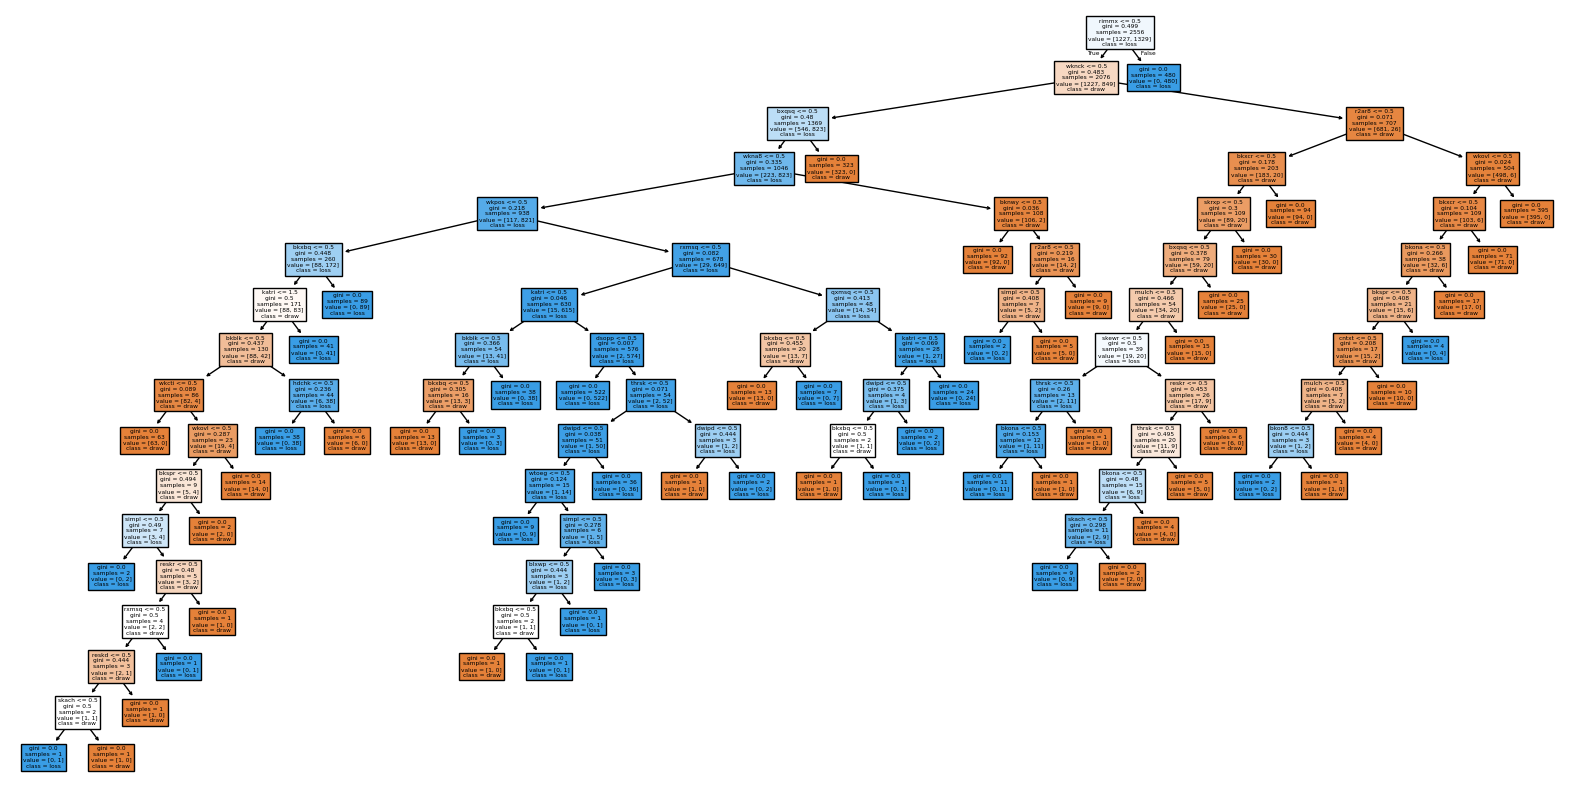

In [91]:
#We do not need to worry about missing attributes because the data providers have already told us that there
#are no missing attributes

#We need to encode the categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in sec2_df.columns:
    sec2_df[col] = le.fit_transform(sec2_df[col])

#we are encoded so now it is time to split the data
X = sec2_df.drop('class', axis=1)
y = sec2_df['class']

#splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier(random_state=42)

#fit the tree and display it
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['draw', 'loss', 'win'], filled=True)
plt.show()


In [92]:
# Perform KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

errors = []

for i in range(10):
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    errors.append(1 - scores)

mean_error = np.mean(errors)
std_error = np.std(errors)

print(f'Mean error: {mean_error:.2f}')
print(f'Standard deviation of error: {std_error:.2f}')

Mean error: 0.00
Standard deviation of error: 0.00


*Here we see unlike the other data set that I made this tree actually has 0 error. This makes sense the more that you think about it because the dataset is based on a specific position in chess and since it is all encompassing of that position it should always be able to correctly classify whether a win is possible for white or not*

### Section 3 - vote

In [93]:
#Lets take a quick look at the next dataset
sec3_data = arff.loadarff('dataset_56_vote.arff')

sec3_df = pd.DataFrame(sec3_data[0])

print(sec3_df.head())

  handicapped-infants water-project-cost-sharing  \
0                b'n'                       b'y'   
1                b'n'                       b'y'   
2                b'?'                       b'y'   
3                b'n'                       b'y'   
4                b'y'                       b'y'   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                              b'n'                 b'y'            b'y'   
1                              b'n'                 b'y'            b'y'   
2                              b'y'                 b'?'            b'y'   
3                              b'y'                 b'n'            b'?'   
4                              b'y'                 b'n'            b'y'   

  religious-groups-in-schools anti-satellite-test-ban  \
0                        b'y'                    b'n'   
1                        b'y'                    b'n'   
2                        b'y'                    b'n'   
3 

In [94]:
#Time to lambda decode the byte strings
sec3_df = sec3_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

print(sec3_df.head())

  handicapped-infants water-project-cost-sharing  \
0                   n                          y   
1                   n                          y   
2                   ?                          y   
3                   n                          y   
4                   y                          y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   
1                                 n                    y               y   
2                                 y                    ?               y   
3                                 y                    n               ?   
4                                 y                    n               y   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           y                       n   
1                           y                       n   
2                           y                       n   
3 

C:\Users\xschr\AppData\Local\Temp\ipykernel_3760\152028238.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sec3_df = sec3_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [95]:
#Now we check for missing attributes
print(sec3_df.isnull().sum())

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64


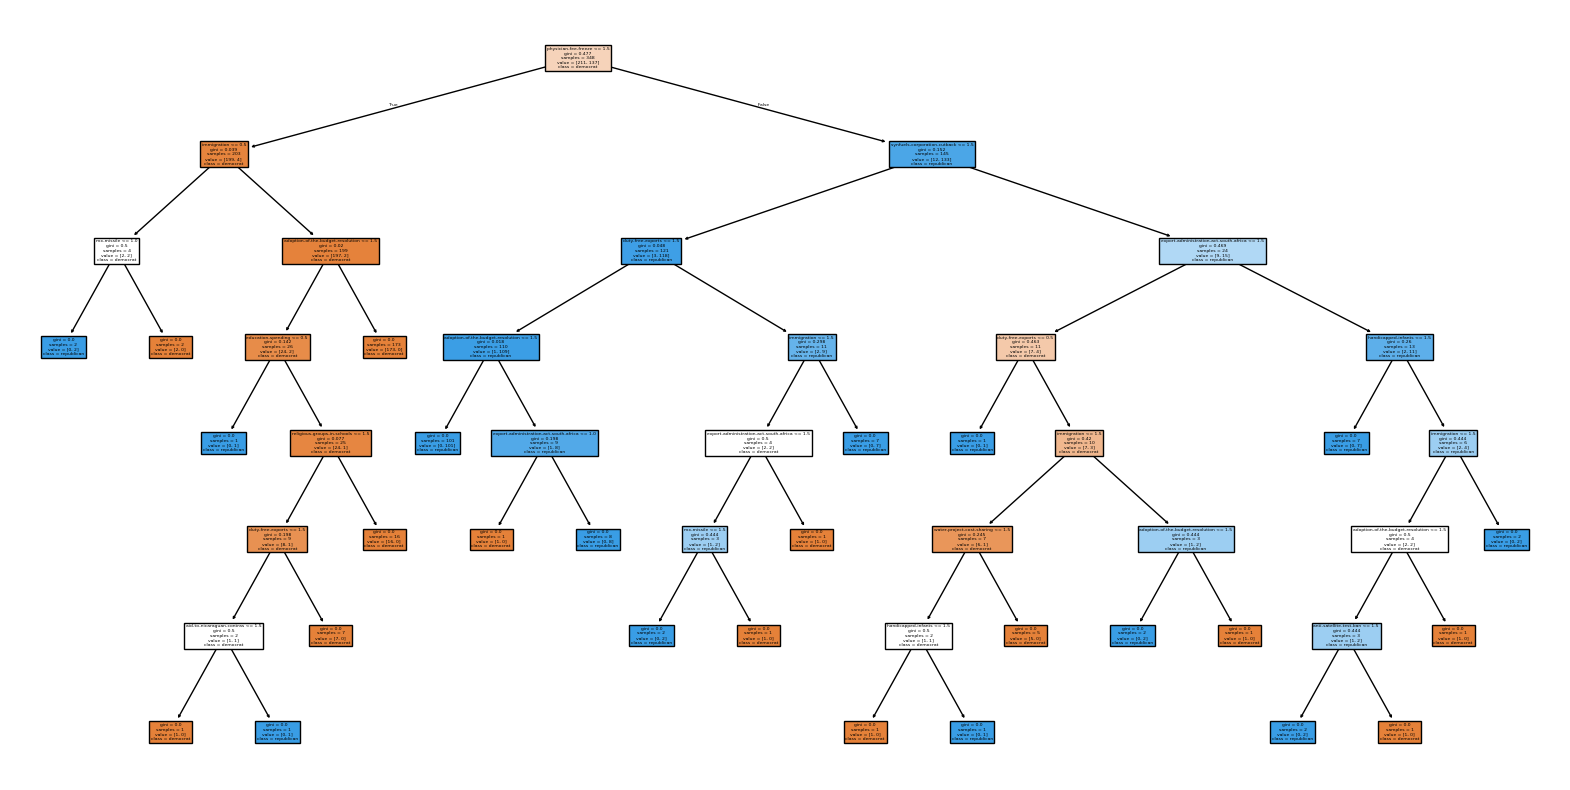

In [96]:
#Now we just encode the categorical data and generate the training and testing sets
#Then generate our tree and show!
for col in sec3_df.columns:
    sec3_df[col] = le.fit_transform(sec3_df[col])

X = sec3_df.drop('Class', axis=1)
y = sec3_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['democrat', 'republican'], filled=True)
plt.show()


In [97]:
#Now perform our KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

errors = []

for i in range(10):
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    errors.append(1 - scores)

mean_error = np.mean(errors)
std_error = np.std(errors)
print(f'Mean error: {mean_error:.2f}')
print(f'Standard deviation of error: {std_error:.2f}')

Mean error: 0.06
Standard deviation of error: 0.03


*Here we find a higher error then our last dataset where we were looking at chess moves because this handles some 'human induced data'. Because this data has a little more nuance than the algorthmic chess set we get a non zero error but at the same time we also are much lower then what we are starting to realize was a near random dataset that I created with the huge error.*

### Section 4 - Sick